In [5]:
#Data preprocessing important libraries
import pandas as pd  #Data manipulation
import argparse
import numpy as np
import pickle  
import nltk  #Natural language processing 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords  #Stop word removal
from nltk.tokenize import word_tokenize  #Tokenizition
from nltk.tokenize import RegexpTokenizer
import pyarabic.araby as araby
import qalsadi.lemmatizer
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
import re
import string  #Remove punctuation & characters

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s7r_2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s7r_2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pip install qalsadi

Defaulting to user installation because normal site-packages is not writeable
  Using cached qalsadi-0.5-py3-none-any.whl.metadata (12 kB)
  Using cached Arabic_Stopwords-0.4.3-py3-none-any.whl.metadata (8.9 kB)
  Using cached alyahmor-0.2-py3-none-any.whl.metadata (11 kB)
  Using cached arramooz_pysqlite-0.4.2-py3-none-any.whl.metadata (4.0 kB)
  Using cached codernitydb3-0.6.0-py3-none-any.whl
  Using cached libqutrub-1.2.4.1-py3-none-any.whl.metadata (7.5 kB)
  Using cached mysam_tagmanager-0.4-py3-none-any.whl.metadata (10 kB)
  Using cached Naftawayh-0.4-py3-none-any.whl.metadata (8.7 kB)
  Using cached pickleDB-0.9.2-py3-none-any.whl
  Using cached Tashaphyne-0.3.6-py3-none-any.whl.metadata (18 kB)
Using cached qalsadi-0.5-py3-none-any.whl (264 kB)
Using cached alyahmor-0.2-py3-none-any.whl (65 kB)
Using cached Arabic_Stopwords-0.4.3-py3-none-any.whl (360 kB)
Using cached arramooz_pysqlite-0.4.2-py3-none-any.whl (6.3 MB)
Using cached libqutrub-1.2.4.1-py3-none-any.whl (138 kB)
Us

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [6]:
text = pd.read_excel(r'C:\Users\s7r_2\Downloads\��تصنيف الاخبار العربيه - نسخة.xlsx')
text.head()

,رقم التصنيف,صنف الخبر,عنوان الخبر
0,0,صحة,الجلوس أكثر من 10 ساعات يومياً يفاقم مخاطر الوفاة
1,5,رياضة,مولر: هناك طريقة واحدة لإيقاف خطورة ميسي
2,6,اقتصاد,"وزير مالية لبنان: ""إجراءات تقشفية استثنائية"" ب..."
3,4,فن,مروان خوري: هكذا أقضي فترة الحجر المنزلي
4,6,اقتصاد,مصر تبدأ حملة التطعيم بلقاح كورونا لعامة الشعب


In [7]:
def clean_data(data):
     clean_text = data['عنوان الخبر'].str.replace(f'[{string.punctuation}]', '', regex=True)
    # إزالة الأرقام
     clean_text = clean_text.str.replace(r'\d+', '', regex=True)
    # إضافة العمود الجديد 'clean'
     data['clean'] = clean_text
     return data
clean_data = clean_data(text)
text.head()

,رقم التصنيف,صنف الخبر,عنوان الخبر,clean
0,0,صحة,الجلوس أكثر من 10 ساعات يومياً يفاقم مخاطر الوفاة,الجلوس أكثر من ساعات يومياً يفاقم مخاطر الوفاة
1,5,رياضة,مولر: هناك طريقة واحدة لإيقاف خطورة ميسي,مولر هناك طريقة واحدة لإيقاف خطورة ميسي
2,6,اقتصاد,"وزير مالية لبنان: ""إجراءات تقشفية استثنائية"" ب...",وزير مالية لبنان إجراءات تقشفية استثنائية بموا...
3,4,فن,مروان خوري: هكذا أقضي فترة الحجر المنزلي,مروان خوري هكذا أقضي فترة الحجر المنزلي
4,6,اقتصاد,مصر تبدأ حملة التطعيم بلقاح كورونا لعامة الشعب,مصر تبدأ حملة التطعيم بلقاح كورونا لعامة الشعب


In [8]:
def normalize_arabic(text):
    text = re.sub("[أإآ]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("كـ", "ك", text)
    return text
text['clean'] = text['clean'].apply(normalize_arabic)
text.head()

,رقم التصنيف,صنف الخبر,عنوان الخبر,clean
0,0,صحة,الجلوس أكثر من 10 ساعات يومياً يفاقم مخاطر الوفاة,الجلوس اكثر من ساعات يومياً يفاقم مخاطر الوفاه
1,5,رياضة,مولر: هناك طريقة واحدة لإيقاف خطورة ميسي,مولر هناك طريقه واحده لايقاف خطوره ميسي
2,6,اقتصاد,"وزير مالية لبنان: ""إجراءات تقشفية استثنائية"" ب...",وزير ماليه لبنان اجراءات تقشفيه استثنائيه بموا...
3,4,فن,مروان خوري: هكذا أقضي فترة الحجر المنزلي,مروان خوري هكذا اقضي فتره الحجر المنزلي
4,6,اقتصاد,مصر تبدأ حملة التطعيم بلقاح كورونا لعامة الشعب,مصر تبدا حمله التطعيم بلقاح كورونا لعامه الشعب


In [9]:

stop_words = set(stopwords.words('arabic'))  # تحديد كلمات التوقف باللغة العربية

# دالة لإزالة كلمات التوقف
def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

# تطبيق الدالة على عمود 'عنوان الخبر' وإضافة النتائج في عمود جديد 'cleaned_stopwords'
text['cleaned_stopwords'] = text['clean'].apply(remove_stop_words)

# عرض أول خمس صفوف للتحقق من النتائج
text.head()

,رقم التصنيف,صنف الخبر,عنوان الخبر,clean,cleaned_stopwords
0,0,صحة,الجلوس أكثر من 10 ساعات يومياً يفاقم مخاطر الوفاة,الجلوس اكثر من ساعات يومياً يفاقم مخاطر الوفاه,الجلوس اكثر ساعات يومياً يفاقم مخاطر الوفاه
1,5,رياضة,مولر: هناك طريقة واحدة لإيقاف خطورة ميسي,مولر هناك طريقه واحده لايقاف خطوره ميسي,مولر طريقه واحده لايقاف خطوره ميسي
2,6,اقتصاد,"وزير مالية لبنان: ""إجراءات تقشفية استثنائية"" ب...",وزير ماليه لبنان اجراءات تقشفيه استثنائيه بموا...,وزير ماليه لبنان اجراءات تقشفيه استثنائيه بموازنه
3,4,فن,مروان خوري: هكذا أقضي فترة الحجر المنزلي,مروان خوري هكذا اقضي فتره الحجر المنزلي,مروان خوري اقضي فتره الحجر المنزلي
4,6,اقتصاد,مصر تبدأ حملة التطعيم بلقاح كورونا لعامة الشعب,مصر تبدا حمله التطعيم بلقاح كورونا لعامه الشعب,مصر تبدا حمله التطعيم بلقاح كورونا لعامه الشعب


In [10]:
def remove_diacritics(text):
    return araby.strip_tashkeel(text)

text['cleaned_stopwords'] = text['cleaned_stopwords'].apply(remove_diacritics)
text.head()

,رقم التصنيف,صنف الخبر,عنوان الخبر,clean,cleaned_stopwords
0,0,صحة,الجلوس أكثر من 10 ساعات يومياً يفاقم مخاطر الوفاة,الجلوس اكثر من ساعات يومياً يفاقم مخاطر الوفاه,الجلوس اكثر ساعات يوميا يفاقم مخاطر الوفاه
1,5,رياضة,مولر: هناك طريقة واحدة لإيقاف خطورة ميسي,مولر هناك طريقه واحده لايقاف خطوره ميسي,مولر طريقه واحده لايقاف خطوره ميسي
2,6,اقتصاد,"وزير مالية لبنان: ""إجراءات تقشفية استثنائية"" ب...",وزير ماليه لبنان اجراءات تقشفيه استثنائيه بموا...,وزير ماليه لبنان اجراءات تقشفيه استثنائيه بموازنه
3,4,فن,مروان خوري: هكذا أقضي فترة الحجر المنزلي,مروان خوري هكذا اقضي فتره الحجر المنزلي,مروان خوري اقضي فتره الحجر المنزلي
4,6,اقتصاد,مصر تبدأ حملة التطعيم بلقاح كورونا لعامة الشعب,مصر تبدا حمله التطعيم بلقاح كورونا لعامه الشعب,مصر تبدا حمله التطعيم بلقاح كورونا لعامه الشعب


In [12]:

# تهيئة الكائن Lemmatizer من مكتبة qalsadi
lemmer = qalsadi.lemmatizer.Lemmatizer()

# دالة لتطبيق التجذير على نص واحد
def lemmatize_arabic(text):
    lemmas = lemmer.lemmatize_text(text, return_pos=True)  # معالجة التجذير للنص
    return lemmas

# افتراضًا أن عمود 'cleaned_stopwords' يحتوي على النصوص التي نريد تجذيرها
text['lemmatized_text'] = text['cleaned_stopwords'].apply(lambda x: lemmatize_arabic(x))

# عرض النتائج
filtered_data = text[['cleaned_stopwords', 'lemmatized_text']]

# عرض العمودين
print(filtered_data)


                                       cleaned_stopwords  \
0             الجلوس اكثر ساعات يوميا يفاقم مخاطر الوفاه   
1                     مولر طريقه واحده لايقاف خطوره ميسي   
2      وزير ماليه لبنان اجراءات تقشفيه استثنائيه بموازنه   
3                     مروان خوري اقضي فتره الحجر المنزلي   
4         مصر تبدا حمله التطعيم بلقاح كورونا لعامه الشعب   
...                                                  ...   
57782  Wave سوار مضيء متعدد الاستخدامات مرتبط بالهوات...   
57783  ترمب يامر بسحب غالبيه القوات الاميركيه الصومال...   
57784            تاجيل زياره باخ الي اليابان بسبب كورونا   
57785         زعزوع مصر توجود سياحه ايرانيه الوقت الحالي   
57786    حمدوك البنك الدولي تعهد بـ مليارات لدعم السودان   

                                         lemmatized_text  
0      [(جلوس, noun), (كثر, verb), (ساعة, noun), (يوم...  
1      [(مولر, all), (طريق, noun), (واحد, noun), (لاي...  
2      [(زير, noun), (مال, noun), (لبن, noun), (اجراء...  
3      [(مرو, noun), (خور, noun), (قضى, ver

In [13]:
# افترض أن 'lemmatized_text' يحتوي على قائمة من tuples
text['lemmatized'] = text['lemmatized_text'].apply(lambda x: ' '.join([word[0] for word in x]))
text.to_excel(r'C:\Users\s7r_2\Downloads\��تصنيف الاخبار العربيه - نسخة.xlsx', index=False)

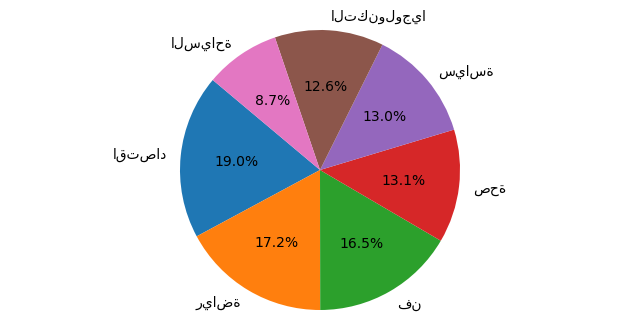

In [14]:
# حساب عدد الأخبار في كل فئة (استبدل 'صنف الخبر' باسم العمود في بياناتك)
category_counts = text['صنف الخبر'].value_counts()
reshaped_labels = category_counts.index  # تحديد أسماء الفئات من البيانات

# رسم دائري يوضح توزيع الفئات
plt.figure(figsize=(8, 4))
plt.pie(category_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

# عرض الرسم البياني
plt.show()

In [15]:
# تعريف الوظائف
def most_common_words(tokenized_text, top_n=200):
    words = Counter(tokenized_text)
    return words.most_common(top_n)

def least_common_words(tokenized_text, bottom_n=200):
    words = Counter(tokenized_text)
    return words.most_common()[:-bottom_n-1:-1]

def most_common_ngrams(tokenized_text, n=2, top_n=200):
    ngrams_list = ngrams(tokenized_text, n)
    ngrams_count = Counter(ngrams_list)
    return ngrams_count.most_common(top_n)

# افترض أن لديك DataFrame اسمه df والعمود الذي يحتوي على النصوص هو 'lemmatized_text'
word2count = {}

# تأكد من أنك تقوم بتحديد العمود الصحيح
for data in text['lemmatized']:  # استبدل 'lemmatized_text' بالعمود المناسب
    words = nltk.word_tokenize(data)  # تقسيم النص إلى كلمات (توكينز)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

# تحويل القاموس إلى DataFrame
word_count_df = pd.DataFrame(word2count.items(), columns=['Word', 'Count'])

# استخدام الوظائف المساعدة
tokenized_text = nltk.word_tokenize(' '.join(text['lemmatized']))  # جمع جميع النصوص
print("Most common words:")
print(most_common_words(tokenized_text))

print("Least common words:")
print(least_common_words(tokenized_text))

print("Most common 2-grams:")
print(most_common_ngrams(tokenized_text, n=2))


Most common words:
[('علي', 6489), ('ال', 3774), ('؟', 3062), ('مصر', 2942), ('كار', 2832), ('جديد', 2719), ('السعوديه', 2183), ('مليار', 1774), ('عالم', 1580), ('ب', 1295), ('سبب', 1269), ('اقتصاد', 1237), ('عام', 1205), ('مليون', 1096), ('دب', 1092), ('دور', 1074), ('طير', 1043), ('سب', 1003), ('ايران', 924), ('الامارات', 924), ('اميركا', 922), ('شهر', 879), ('بريطاني', 872), ('تطبيق', 870), ('امام', 861), ('صور', 839), ('ترمب', 823), ('خلال', 822), ('اتحاد', 818), ('سعودي', 790), ('ترك', 778), ('لصى', 776), ('بلا', 772), ('اتفاق', 765), ('لقاح', 753), ('فن', 745), ('اول', 742), ('طلق', 740), ('توقع', 738), ('يوم', 732), ('عراق', 727), ('رئيس', 717), ('حذر', 703), ('عمل', 697), ('علن', 688), ('دعم', 676), ('عرب', 660), ('سياح', 651), ('استثمار', 629), ('تعرف', 619), ('ل', 617), ('دول', 613), ('رحلة', 612), ('هاتف', 607), ('فيروس', 598), ('قطاع', 595), ('نمو', 593), ('مطار', 592), ('كثر', 579), ('لاعب', 579), ('زير', 575), ('عبر', 573), ('تراجع', 570), ('نظام', 567), ('حول', 564), ('ا

In [107]:
from sklearn.feature_extraction.text import CountVectorizer  # تأكد من استيراد CountVectorizer
#نفس الانجليزي طبقت
#Bag of Words (BoW)
bow_vectorizer = CountVectorizer(min_df=5)
bow_matrix = bow_vectorizer.fit_transform(text['lemmatized'])

#Convert to DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("Bag of Words (BoW) Matrix:")
print(bow_df)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [104]:
print(text['lemmatized'].head())  # عرض أول 5 صفوف من العمود
print(text['lemmatized'].dtype)

0    [ ( ' ج ل و س ' ,   ' n o u n ' ) ,   ( ' ك ث ...
1    [ ( ' م و ل ر ' ,   ' a l l ' ) ,   ( ' ط ر ي ...
2    [ ( ' ز ي ر ' ,   ' n o u n ' ) ,   ( ' م ا ل ...
3    [ ( ' م ر و ' ,   ' n o u n ' ) ,   ( ' خ و ر ...
4    [ ( ' م ص ر ' ,   ' n o u n ' ) ,   ( ' ب د ' ...
Name: lemmatized, dtype: object
object


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import pandas as pd
import numpy as np

# تحميل البيانات الخاصة بك
text = pd.read_excel(r'C:\Users\s7r_2\Downloads\��تصنيف الاخبار العربيه - نسخة.xlsx')  # تأكد من تحديد المسار الصحيح للملف

# إعداد بيانات التدريب
train_data = text['lemmatized']  # تأكد من أن العمود يحمل الاسم الصحيح
train_labels = text['صنف الخبر']

# إنشاء وتدريب TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features=000
)

# تحويل بيانات التدريب
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data)

# تحويل إلى DataFrame وعرض بعض البيانات
vocab = tfidf_vectorizer.get_feature_names_out()
unigramdata_features = pd.DataFrame(np.round(X_train_tfidf.toarray(), 1), columns=vocab)
print(unigramdata_features.head())

# حفظ الـ Vectorizer
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')


   apple  bbm  fbi  galaxy  gif  google  htc  imf  ios  iphone  ...  يورو  \
0    0.0  0.0  0.0     0.0  0.0     0.0  0.0  0.0  0.0     0.0  ...   0.0   
1    0.0  0.0  0.0     0.0  0.0     0.0  0.0  0.0  0.0     0.0  ...   0.0   
2    0.0  0.0  0.0     0.0  0.0     0.0  0.0  0.0  0.0     0.0  ...   0.0   
3    0.0  0.0  0.0     0.0  0.0     0.0  0.0  0.0  0.0     0.0  ...   0.0   
4    0.0  0.0  0.0     0.0  0.0     0.0  0.0  0.0  0.0     0.0  ...   0.0   

   يوسف  يوفنتوس  يولي  يوم  يونان  يونايتد  يونس  يونغ  يويفا  
0   0.0      0.0   0.0  0.3    0.0      0.0   0.0   0.0    0.0  
1   0.0      0.0   0.0  0.0    0.0      0.0   0.0   0.0    0.0  
2   0.0      0.0   0.0  0.0    0.0      0.0   0.0   0.0    0.0  
3   0.0      0.0   0.0  0.0    0.0      0.0   0.0   0.0    0.0  
4   0.0      0.0   0.0  0.0    0.0      0.0   0.0   0.0    0.0  

[5 rows x 5000 columns]


['vectorizer.pkl']

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# تأكد من أن لديك DataFrame df مع الأعمدة المناسبة
# إنشاء مصفوفة TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())  # يمكنك تخصيص هذه الدالة إذا لزم الأمر
tfidf_matrix = tfidf_vectorizer.fit_transform(text['lemmatized'])  # استبدل text['lemmatized'] بعمودك المناسب
category = text['صنف الخبر']  # استبدل text['صنف الخبر'] بعمودك المناسب

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, category, test_size=0.2, random_state=42)

# إظهار النتائج
print("عدد العناصر في مجموعة التدريب:", X_train.shape[0])
print("عدد العناصر في مجموعة الاختبار:", X_test.shape[0])
print("عدد الميزات (features):", X_train.shape[1])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


عدد العناصر في مجموعة التدريب: 46229
عدد العناصر في مجموعة الاختبار: 11558
عدد الميزات (features): 23591


In [50]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)  # إجراء التنبؤات
    accuracy = accuracy_score(y_test, predictions)  # حساب الدقة
    report = classification_report(y_test, predictions)  # توليد تقرير التصنيف
    return accuracy, report

# نموذج SVM
svm_model = SVC(kernel='linear', class_weight='balanced')  # نموذج SVM مع وزن الصفوف
svm_model.fit(X_train, y_train)  # تدريب النموذج
svm_accuracy, svm_report = evaluate_model(svm_model, X_test, y_test)  # تقييم SVM
print("SVM Accuracy:", svm_accuracy)  # طباعة الدقة
print("SVM Classification Report:\n", svm_report)  # طباعة تقرير التصنيف

#لحفظ النموذج 
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)
print("تم حفظ النموذج بنجاح!") 

SVM Accuracy: 0.9116629174597681
SVM Classification Report:
               precision    recall  f1-score   support

      اقتصاد       0.90      0.89      0.89      2113
 التكنولوجيا       0.92      0.92      0.92      1499
     السياحة       0.91      0.91      0.91      1029
       رياضة       0.97      0.96      0.97      1956
       سياسة       0.85      0.85      0.85      1481
         صحة       0.89      0.93      0.91      1511
          فن       0.92      0.91      0.91      1969

    accuracy                           0.91     11558
   macro avg       0.91      0.91      0.91     11558
weighted avg       0.91      0.91      0.91     11558

تم حفظ النموذج بنجاح!


In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # التنبؤ بالتصنيفات
    accuracy = accuracy_score(y_test, y_pred)  # حساب الدقة
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test))  # إنشاء تقرير التصنيف
    return accuracy, report


# نموذج Naive Bayes
nb_model = MultinomialNB()  # نموذج Naive Bayes
nb_model.fit(X_train, y_train)  # تدريب النموذج
nb_accuracy, nb_report = evaluate_model(nb_model, X_test, y_test)  # تقييم Naive Bayes
print("Naive Bayes Accuracy:", nb_accuracy)  # طباعة الدقة
print("Naive Bayes Classification Report:\n", nb_report)  # طباعة تقرير التصنيف

#لحفظ النموذج 
with open('nb_model.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)
print("تم حفظ النموذج بنجاح!") 

Naive Bayes Accuracy: 0.8857933898598374
Naive Bayes Classification Report:
               precision    recall  f1-score   support

      اقتصاد       0.75      0.95      0.84      2113
 التكنولوجيا       0.94      0.87      0.91      1499
     السياحة       0.95      0.70      0.80      1029
       رياضة       0.96      0.96      0.96      1956
       سياسة       0.90      0.76      0.82      1481
         صحة       0.91      0.91      0.91      1511
          فن       0.90      0.93      0.91      1969

    accuracy                           0.89     11558
   macro avg       0.90      0.87      0.88     11558
weighted avg       0.89      0.89      0.89     11558

تم حفظ النموذج بنجاح!


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # التنبؤ بالتصنيفات
    accuracy = accuracy_score(y_test, y_pred)  # حساب الدقة
    report = classification_report(y_test, y_pred, target_names=np.unique(y_test))  # إنشاء تقرير التصنيف
    return accuracy, report


# نموذج Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)  # نموذج Random Forest مع وزن الصفوف
rf_model.fit(X_train, y_train)  # تدريب النموذج
rf_accuracy, rf_report = evaluate_model(rf_model, X_test, y_test)  # تقييم Random Forest
print("Random Forest Accuracy:", rf_accuracy)  # طباعة الدقة
print("Random Forest Classification Report:\n", rf_report)  # طباعة تقرير التصنيف


# لحفظ النموذج 
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
print("تم حفظ النموذج بنجاح!") 

Random Forest Accuracy: 0.8498010036338467
Random Forest Classification Report:
               precision    recall  f1-score   support

      اقتصاد       0.84      0.85      0.85      2113
 التكنولوجيا       0.90      0.86      0.88      1499
     السياحة       0.87      0.87      0.87      1029
       رياضة       0.92      0.92      0.92      1956
       سياسة       0.81      0.74      0.77      1481
         صحة       0.82      0.86      0.84      1511
          فن       0.79      0.84      0.81      1969

    accuracy                           0.85     11558
   macro avg       0.85      0.85      0.85     11558
weighted avg       0.85      0.85      0.85     11558

تم حفظ النموذج بنجاح!
